In [1]:
from skimage.color import rgb2gray    # rgb to gray scale conversion
import numpy as np
import cv2                            # Read write show image
import matplotlib.pyplot as plt
from scipy import ndimage             # Multi dimensional image processing
from PIL import Image
import copy
from skimage.filters import threshold_multiotsu

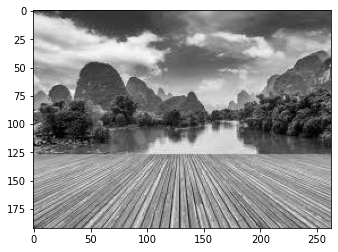

In [2]:
images = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\bw.jpeg')
image = copy.deepcopy(images)                      # To get permission for changes with image
plt.imshow(image,cmap = "gray")

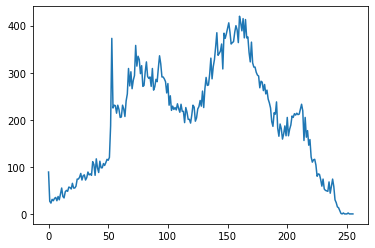

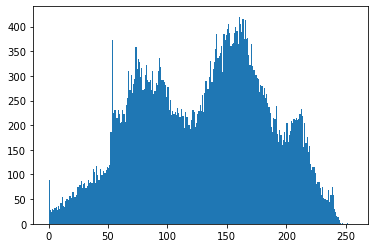

In [4]:
# histogram fastest way is opencv

hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
# histogram using matplotlib
plt.hist(image.ravel(),256,[0,256]); plt.show()

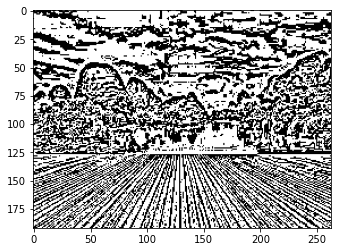

In [5]:
# cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, remove_from_mean)

adap_thres_mean = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,25,2)
adap_thres_wmean = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

plt.imshow(adap_thres_mean,'gray')
plt.imshow(adap_thres_wmean,'gray')

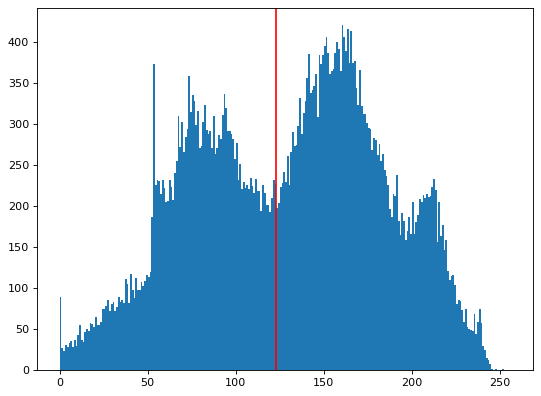

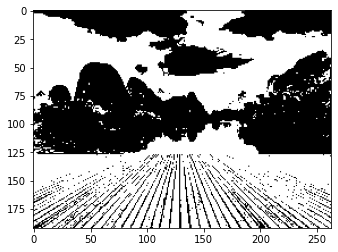

In [6]:
# OTSU Thresholding

ret2,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

histogram = plt.hist(image.ravel(),256,[0,256]); 
plt.axvline(ret2,color = 'red')
plt.show()
plt.imshow(th2,'gray')

In [7]:
# OTSU in python


# find normalized_histogram, and its cumulative distribution function
pixel_number = image.shape[0] * image.shape[1]
mean_weigth = 1.0/pixel_number
his, bins = np.histogram(image, np.array(range(0, 256)))
final_thresh = -1
final_value = -1
for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    Wb = np.sum(his[:t]) * mean_weigth
    Wf = np.sum(his[t:]) * mean_weigth

    mub = np.mean(his[:t])
    muf = np.mean(his[t:])

    value = Wb * Wf * (mub - muf) ** 2

    print("Wb", Wb, "Wf", Wf)
    print("t", t, "value", value)

    if value > final_value:
        final_thresh = t
        final_value = value

print("Threshold calculated",final_thresh)

Wb 0.0017625158428390367 Wf 0.9982374841571608
t 1 value 21.077558601497728
Wb 0.002297211660329531 Wf 0.9977027883396704
t 2 value 45.65029169766067
Wb 0.0027526932826362482 Wf 0.9972473067173637
t 3 value 64.67776437817541
Wb 0.0033666032953105192 Wf 0.9966333967046894
t 4 value 83.76305434024118
Wb 0.003921102661596958 Wf 0.9960788973384029
t 5 value 101.98625975964575
Wb 0.004574619771863118 Wf 0.9954253802281369
t 6 value 121.53318470994611
Wb 0.005267743979721165 Wf 0.9947322560202788
t 7 value 141.86509369081293
Wb 0.005822243346007604 Wf 0.9941777566539923
t 8 value 160.46008968327862
Wb 0.0065549746514575406 Wf 0.9934450253485424
t 9 value 181.9288459879992
Wb 0.007149081115335867 Wf 0.992850918884664
t 10 value 201.605502776531
Wb 0.00800063371356147 Wf 0.9919993662864385
t 11 value 225.52000260585618
Wb 0.009089828897338403 Wf 0.9909101711026616
t 12 value 253.2021948759708
Wb 0.00982256020278834 Wf 0.9901774397972116
t 13 value 276.00667444092534
Wb 0.010495880861850443 Wf 

Wb 0.9981384664131812 Wf 0.0018615335868187577
t 240 value 77.12965312425608
Wb 0.9987325728770595 Wf 0.0012674271229404308
t 241 value 53.03534369144423
Wb 0.9992078580481621 Wf 0.0007921419518377693
t 242 value 33.399490549412796
Wb 0.9995049112801013 Wf 0.0004950887198986058
t 243 value 20.921019980089707
Wb 0.9997623574144486 Wf 0.00023764258555133077
t 244 value 10.063685981299521
Wb 0.9999009822560202 Wf 9.901774397972116e-05
t 245 value 4.184618671310945
Wb 0.9999207858048161 Wf 7.921419518377693e-05
t 246 value 3.3224671580397804
Wb 0.9999207858048161 Wf 7.921419518377693e-05
t 247 value 3.293765975876237
Wb 0.999960392902408 Wf 3.9607097591888464e-05
t 248 value 1.6372397438186903
Wb 0.999960392902408 Wf 3.9607097591888464e-05
t 249 value 1.6233334884334
Wb 0.999960392902408 Wf 3.9607097591888464e-05
t 250 value 1.6092868514498904
Wb 0.999960392902408 Wf 3.9607097591888464e-05
t 251 value 1.5948741136965832
Wb 0.9999999999999999 Wf 0.0
t 252 value 0.0
Wb 0.9999999999999999 Wf 

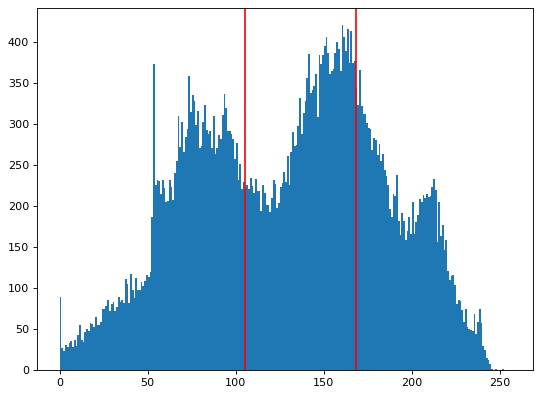

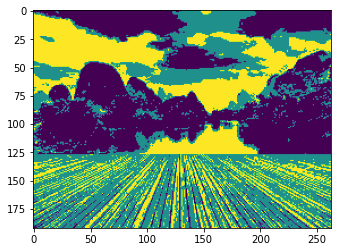

In [8]:
# Multiple otsu

thresholds = threshold_multiotsu(image)
regions = np.digitize(image,bins = thresholds)

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

histogram = plt.hist(image.ravel(),256,[0,256]); 

for line in thresholds:
    plt.axvline(line,color = 'red')

plt.show()
plt.imshow(regions)

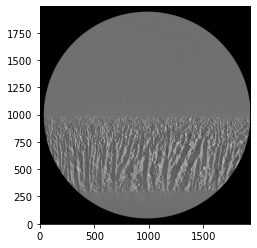

In [28]:
#Actual image using Adaptive thresholding / OTSU

images_3d = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\CZ XRM_Clemson_Carbon_HR_0.34um_0011.tiff')
image_3d = copy.deepcopy(images_3d)                      # To get permission for changes with image
image_3d = (image_3d/256).astype('uint8')
plt.imshow(image_3d,origin = 'lower',cmap = "gray")

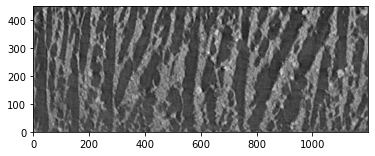

In [29]:
image_3d = image_3d[300:750,400:1600]
plt.imshow(image_3d,origin = 'lower',cmap = "gray")

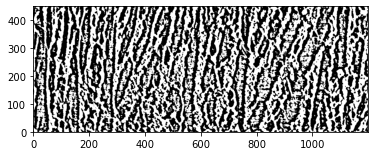

In [30]:
#Actual image using Adaptive thresholding

images_3d = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\CZ XRM_Clemson_Carbon_HR_0.34um_0011.tiff')
image_3d = copy.deepcopy(images_3d)                      # To get permission for changes with image
image_3d = (image_3d/256).astype('uint8')
plt.imshow(image_3d,cmap = "gray")

image_3d = image_3d[300:750,400:1600]
plt.imshow(image_3d,origin = 'lower',cmap = "gray")

adap_thres_mean = cv2.adaptiveThreshold(image_3d,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,25,2)
plt.imshow(adap_thres_mean,origin = 'lower',cmap = 'gray')

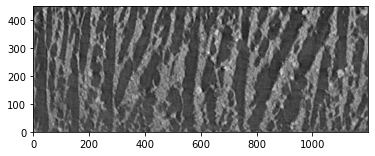

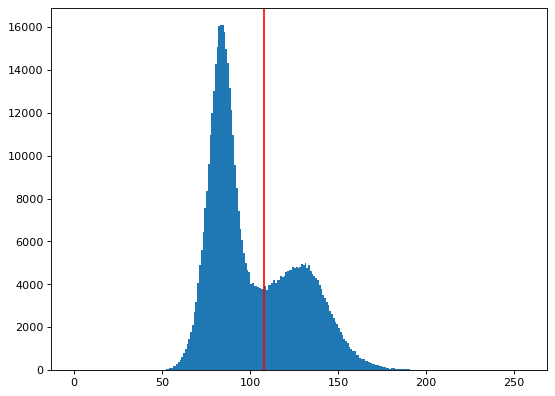

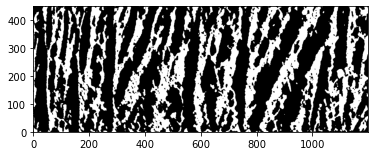

In [33]:
# Actual image using OTSU

images_3d = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\CZ XRM_Clemson_Carbon_HR_0.34um_0011.tiff')
image_3d = copy.deepcopy(images_3d)                      # To get permission for changes with image
image_3d = (image_3d/256).astype('uint8')
plt.imshow(image_3d,origin = 'lower',cmap = "gray")

image_3d = image_3d[300:750,400:1600]
plt.imshow(image_3d,origin = 'lower',cmap = "gray")

ret2,th2 = cv2.threshold(image_3d,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

histogram = plt.hist(image_3d.ravel(),256,[0,256]); 
plt.axvline(ret2,color = 'red')
plt.show()

plt.imshow(th2,origin = 'lower',cmap = 'gray')


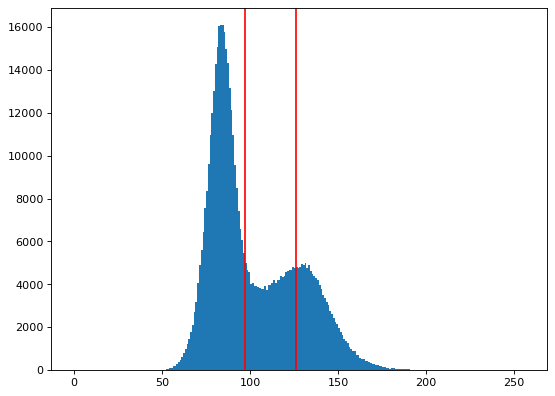

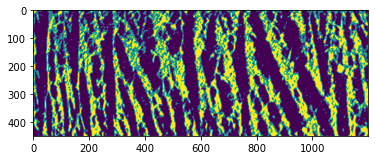

In [34]:
# Actual image using multiple OTSU

thresholds = threshold_multiotsu(image_3d)
regions = np.digitize(image_3d,bins = thresholds)

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

histogram = plt.hist(image_3d.ravel(),256,[0,256]); 

for line in thresholds:
    plt.axvline(line,color = 'red')

plt.show()
plt.imshow(regions)

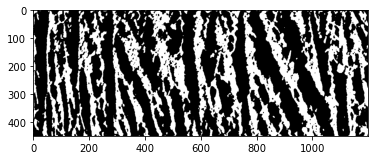

In [36]:
# Actual image using kmeans with 2 clusters


"""  As we dont have training images we cannot make a call on number of clusters but
    By looking at the histogram we can see that it has two peaks, dividing it into two parts will be ideal.
"""

images_3d = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\CZ XRM_Clemson_Carbon_HR_0.34um_0011.tiff')
image_3d = copy.deepcopy(images_3d)                      # To get permission for changes with image
image_3d = (image_3d/256).astype('uint8')
plt.imshow(image_3d,cmap = "gray")

image_3d = image_3d[300:750,400:1600]
image_3d = image_3d/255
plt.imshow(image_3d,cmap = "gray")


image_n = image_3d.reshape(image_3d.shape[0] * image_3d.shape[1],1)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=0).fit(image_n)

pic_show = kmeans.cluster_centers_[kmeans.labels_]   

cluster_pic = pic_show.reshape(image_3d.shape[0],image_3d.shape[1])
plt.imshow(cluster_pic,cmap = "gray")

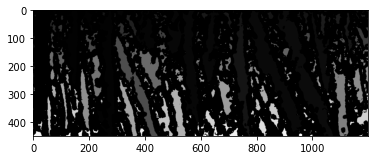

In [37]:
# contour detection and water shed algorithm

from scipy import ndimage as ndi
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage.filters import rank
from skimage.util import img_as_ubyte


images_3d = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\CZ XRM_Clemson_Carbon_HR_0.34um_0011.tiff')
image_3d = copy.deepcopy(images_3d)                      # To get permission for changes with image
image_3d = (image_3d/256).astype('uint8')
plt.imshow(image_3d,cmap = "gray")

image_3d = image_3d[300:750,400:1600]
image_3d = image_3d/255
plt.imshow(image_3d,cmap = "gray")

image_3d = img_as_ubyte(image_3d)

denoised = rank.median(image_3d, disk(2))   # Denoise the image

markers = rank.gradient(denoised, disk(5)) < 25    # find contour with less than 10
markers = ndi.label(markers)[0]

gradient = rank.gradient(denoised, disk(2))         # Makes edges
labels = watershed(gradient, markers)

plt.imshow(gradient)
plt.imshow(markers,'gray')